# Cat-Dog Image Data Preprocessing

<p><b>Status: <span style=color:green;>Completed</span></b></p>

##### LOAD THE FILE DIRECTORIES

In [1]:
import pandas as pd
import numpy as np
import os

data_dir = '../../data/'
classes = os.listdir(data_dir)  # get classes from folder names

# read images files that were read on opencv without error
file_dirs = pd.read_csv('../01-data-exploration/file_dirs.csv', header=None).values
file_dirs = np.ravel(file_dirs)

# modify data for faster testing (optional)
np.random.seed(45)
np.random.shuffle(file_dirs)
file_dirs = file_dirs[:300]   # reduce dataset for testing

file_dirs[:10]

array(['../../data/Cat/9172.jpg', '../../data/Dog/9824.jpg',
       '../../data/Dog/2078.jpg', '../../data/Dog/7727.jpg',
       '../../data/Cat/2665.jpg', '../../data/Cat/1933.jpg',
       '../../data/Cat/1512.jpg', '../../data/Cat/8893.jpg',
       '../../data/Cat/11283.jpg', '../../data/Dog/4324.jpg'],
      dtype=object)

##### EXTRACT IMAGE FEATURES AND LABELS
`HINT`: Increasing the size of the input image (image_size) will keep more information resulting on a better trained model. However, this will also significantly increase the computational time for the training process.


LABEL : Cat


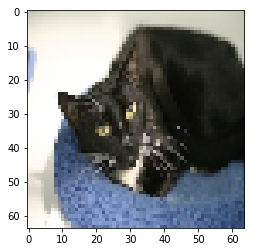


Raw data (first image):


array([[[178., 192., 190.],
        [182., 196., 194.],
        [185., 199., 197.],
        ...,
        [185., 199., 198.],
        [183., 197., 196.],
        [180., 194., 193.]],

       [[187., 201., 200.],
        [191., 205., 203.],
        [194., 208., 207.],
        ...,
        [185., 199., 198.],
        [183., 197., 196.],
        [180., 194., 193.]],

       [[196., 209., 211.],
        [199., 212., 214.],
        [203., 216., 218.],
        ...,
        [185., 199., 198.],
        [183., 197., 196.],
        [180., 194., 193.]],

       ...,

       [[241., 249., 253.],
        [242., 250., 253.],
        [240., 251., 253.],
        ...,
        [123.,  86.,  64.],
        [ 98.,  62.,  45.],
        [119.,  81.,  62.]],

       [[245., 250., 253.],
        [245., 250., 253.],
        [244., 251., 254.],
        ...,
        [108.,  71.,  52.],
        [113.,  73.,  55.],
        [118.,  80.,  62.]],

       [[246., 251., 254.],
        [246., 251., 254.],
        [244., 2

In [2]:
%matplotlib inline
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import cv2

# deploy a progress bar
try:
    from tqdm.notebook import tqdm
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x

# this will store the information from every image
X = []  # feature
y = []  # labels

channels = 3         # three colors: RGB
image_size = 64      # image will be converted to 64x64 images
n_images = len(file_dirs)

X = np.ndarray(shape=(n_images, image_size, image_size, channels), dtype=np.float32)
img_counter = 0

for fname in tqdm(file_dirs):
    # read every single image as an array
    image = cv2.imread(fname, 1)
    
    # resize every image to the desired size
    image = cv2.resize(image,(image_size,image_size))

    # build the list with feature data [RGB values]
    X[img_counter, :, :, :] = image

    # build the list with labels [cats | dogs]
    class_name = fname.split('/')[-2]
    y.append(class_name)

    img_counter += 1


# remove empty arrays
X = X[:n_images]

# plot a sample from the list of images [features]
print('LABEL : ' + y[0])
plt.imshow(cv2.cvtColor(X[0], cv2.COLOR_BGR2RGB).astype(np.uint8))
plt.show()

print('\nRaw data (first image):')
X[0]

##### OUTPUT FEATURES DIMENSIONS

In [3]:
print('samples, width, height, channels')
X.shape

samples, width, height, channels


(300, 64, 64, 3)

##### TRANSFORM THE TARGET VALUES TO ONE-HOT ENCODING

In [4]:
y = pd.get_dummies(y)
y.head()

,Cat,Dog
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [5]:
import pickle

preprocess_data = [X, y]
preprocess_names = ['X', 'y']

for f in range(len(preprocess_data)):
    file_name = 'output/preprocessed_data/{}.pckl'.format(preprocess_names[f])
    saver = open(file_name, 'wb')
    pickle.dump(preprocess_data[f], saver)
    saver.close()

print('preprocess data has been saved succesfully! please check "output/preprocessed_data" folder')

preprocess data has been saved succesfully! please check "output/preprocessed_data" folder
